In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
fm = 5.067
E = 1000 * fm 
z = 0.5 
omega = z * (1-z) * E

qF = 1.5 * fm * fm
Omega = (1.0 - 1.0j)/2.0 * np.sqrt(qF / omega)

N = 2**14
Nu1 = 2*N
Nu2 = N
Nv1 = 2*N
Nv2 = N

origin_v1 = Nv1//2
origin_v2 = Nv2//2

L_dom_x = 2

U1 = np.linspace(-L_dom_x, L_dom_x, Nu1)
U2 = np.linspace(-2*L_dom_x, 2*L_dom_x, Nu2)
V1 = np.linspace(-L_dom_x, L_dom_x, Nv1)
V2 = np.linspace(-2*L_dom_x, 2*L_dom_x/2, Nv2)


origin_u1 = Nu1//2
origin_u2 = Nu2//2
origin_v1 = Nv1//2
origin_v2 = Nv2//2


du1 = U1[1] - U1[0]
du2 = U2[1] - U2[0]
dv1 = V1[1] - V1[0]
dv2 = V2[1] - V2[0]

delta_v1 = np.zeros(Nv1)
d_delta_v1 = np.zeros(Nv1)

delta_v1[origin_v1-1] = 1/(2 * dv1)
delta_v1[origin_v1] = 1/(2 * dv1)
    
d_delta_v1[origin_v1-1] = 1/(dv1*dv1)
d_delta_v1[origin_v1] = -1/(dv1*dv1) 

delta_v2 = np.zeros(Nv2)
d_delta_v2 = np.zeros(Nv2)
    
delta_v2[origin_v2-1] = 1/(2 * dv2)
delta_v2[origin_v2] = 1/(2 * dv2)

d_delta_v2[origin_v2-1] = 1/(dv2*dv2)
d_delta_v2[origin_v2] = -1/(dv2*dv2) 

In [4]:
def source_term(t, i1, i2, j1, j2):
        constant = 1j * omega / np.pi
        phase_fac = np.exp(0.5 * 1j * omega * Omega  / np.tan(Omega * (t + 1e-3)) * (U1[i1]*U1[i1] + U2[i2]*U2[i2]))

        non_hom_term = constant * phase_fac * (U1[i1] * d_delta_v1[j1] * delta_v2[j2] + U2[i2] * d_delta_v2[j2] * delta_v1[j1] )/ \
        (U1[i1]*U1[i1] + U2[i2]*U2[i2] + 1e-2 * du1**2)

        return non_hom_term 

def lamb(t):

        return 0.5 * 1j * omega * Omega / np.tan(Omega * (t + 1e-3))

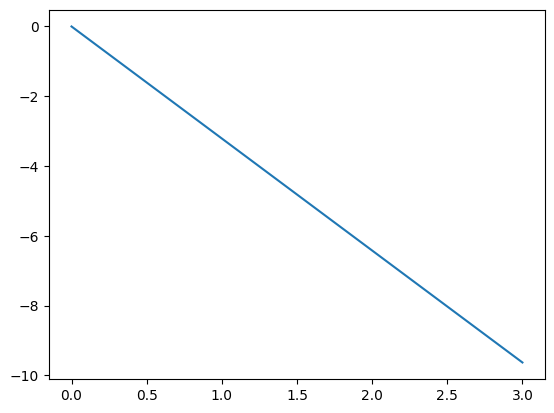

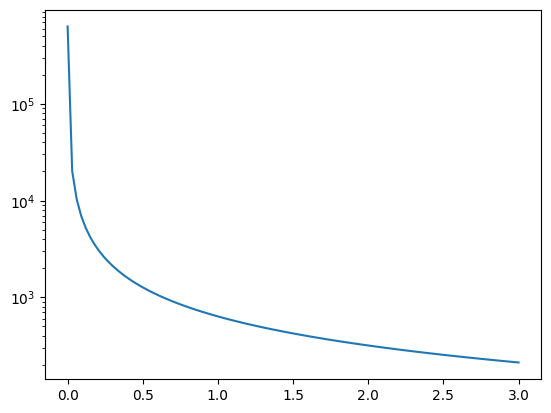

In [5]:
T = np.linspace(0, 3, 100)

plt.plot(T, np.real(lamb(T)))
plt.show()


plt.plot(T, np.imag(lamb(T)))
plt.yscale("log")
plt.show()





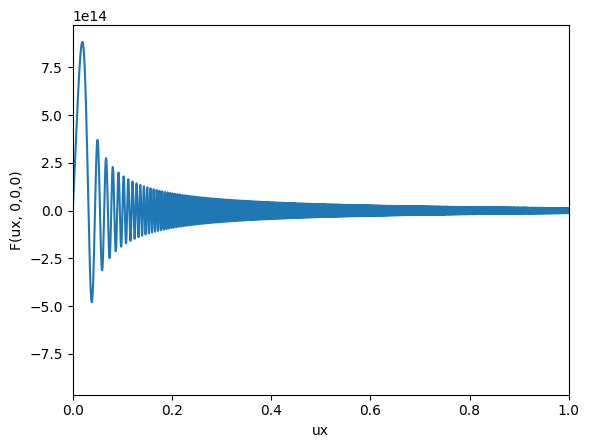

In [27]:
F_U1 = .0 * U1 + 0j

for i in range(len(F_U1)):
    F_U1[i] = source_term(0.1, i, origin_u2, origin_v1, origin_v2)


plt.ylabel("F(ux, 0,0,0)")
plt.xlabel("ux")
plt.xlim(0, 1)
plt.plot(U1, np.real(F_U1))
#plt.plot(U1, np.imag(F_U1))
plt.show()






In [25]:
def fourier_differentiation(X, L):
    Nx = len(X)
    ks = np.fft.fftfreq(Nx, d = L/Nx) * 2 * np.pi 

    df = np.fft.ifft(-ks ** 2 * np.fft.fft(X))

    return df 


def fourier_transform(X, L):
    Nx = len(X)
    ks = np.fft.fftfreq(Nx, d = L/Nx) * 2 * np.pi 

    fhat = np.fft.fft(X)

    return ks, fhat



In [26]:
F2U1 = fourier_differentiation(F_U1, 2*L_dom_x)
F2V1 = fourier_transform(F_V1, 2*L_dom_x)

NameError: name 'F_V1' is not defined

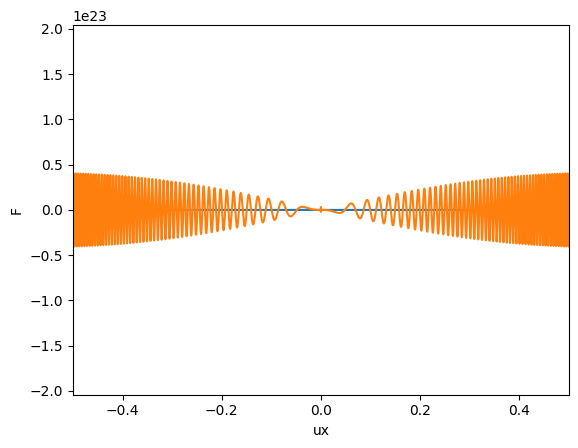

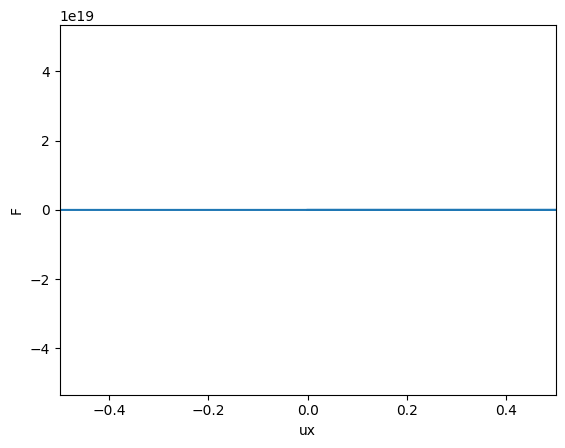

In [ ]:
plt.xlabel("ux")
plt.ylabel("F")
plt.xlim(-0.5, 0.5)
plt.plot(U1, np.real(F_U1))
plt.plot(U1, np.real(F2U1))

plt.show()

plt.xlabel("ux")
plt.ylabel("F")
plt.xlim(-0.5, 0.5)
plt.plot(F2V1[0], np.real(F2V1[1]))

plt.show()

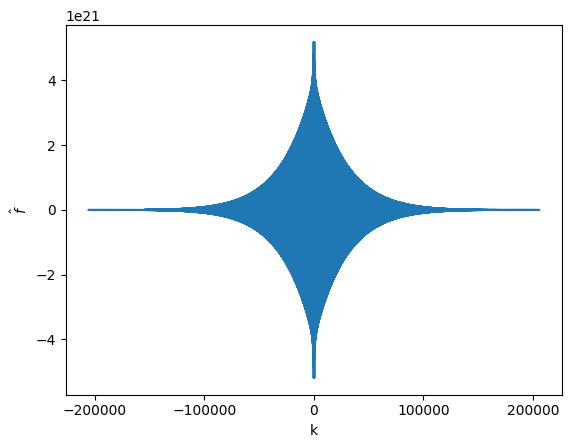

In [ ]:
ks, fhat = fourier_transform(F_U1, 2*L_dom_x)

plt.xlabel("k")
plt.ylabel(r"$\hat{f}$")
plt.plot(ks, np.real(fhat))

plt.show()